# Graham Scan
The Graham Scan is a method of finding the convex hull for a finite set of points in the plane. The convex hull is the smallest convex polygon that contains all the points in the set.

* The time complexity: O(n log n). n is the number of input points. 
* The space complexity: O(n). Graham Scan stores all the points.

## Why is Graham Scan important?
The convex hull is the smallest convex polygon that encloses all of the points. This is a fundamental problem in computational geometry with applications in various fields such as computer graphics, pattern recognition, geographic information systems (GIS), and robotics.

Here are two scenarios where the Graham Scan algorithm is used:

### Pathfinding in Robotics and Autonomous Vehicles:
In robotics or autonomous systems, navigating through an environment efficiently is critical. The Graham Scan can be used to compute the convex hull of a set of obstacles in the environment. By knowing the convex hull, a robot or an autonomous vehicle can make decisions about the safest and most efficient paths to take that avoid these obstacles. For instance, in a field with scattered debris, the robot could use the convex hull to determine a clear path by only considering the outermost points of the debris.
### Geographical Data Analysis:
In GIS, the Graham Scan is used to analyze geographical data by creating simplified representations of more complex shapes. For example, in order to create a simplified boundary that represents a body of land or a cluster of geographical points of interest (like cities, landmarks, etc.), the Graham Scan can compute the convex hull to serve as this boundary. This simplification is useful for creating clear and uncluttered maps, as well as for performing spatial analysis, such as calculating the area of the land or performing proximity searches.

## What did Graham Scan do?
1. Finding the Start Point: Select the point with the lowest y-coordinate as the start point. If there are multiple points with the same lowest y-coordinate, the point with the lowest x-coordinate among them is chosen. This point is guaranteed to be a part of the convex hull.
2. Sorting Points: Sort the remaining points based on the angle they and the start point make with the x-axis (polar angle). This is effectively sorting by the counterclockwise order from the start point.
3. Constructing the Hull: The sorted array of points is iterated through, and for each point, it is determined whether moving from the two points immediately preceding it constitutes making a left turn or a right turn. If a right turn is made, the second-to-last point is not part of the convex hull and is removed. This step is repeated until a left turn is made, ensuring that the boundary of the hull is always convex.
4. Completion: Once all points are processed, the points that remain in the stack compose the convex hull.

## Dependencies

In [ ]:
# install dependencies
!pip install matplotlib
!pip install imageio

In [1]:
# import libraries
import math
import random
import imageio
import time
import io
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

## The Algorithm

In [2]:
def dist(p1, p2):
    x1, y1, x2, y2 = *p1, *p2
    return math.sqrt((y2-y1)**2 + (x2-x1)**2)

def polar_angle(p1, p2):
    if p1[1] == p2[1]:
        return -math.pi
    dy = p1[1]-p2[1]
    dx = p1[0]-p2[0]
    return math.atan2(dy, dx)

def orientation(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0:
        return 0
    return 2 if val > 0 else 1

def graham(points):
    p0 = min(points, key=lambda p: (p[1], p[0]))
    points.sort(key=lambda p: (polar_angle(p0, p), dist(p0, p)))
    hull = []
    for i in range(len(points)):
        while len(hull) >= 2 and orientation(hull[-2], hull[-1], points[i]) != 1:
            hull.pop()
        hull.append(points[i])
    return hull

## Test Data

In [3]:
# Generate 20 random points
test_points = 20
random_points = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(test_points)]

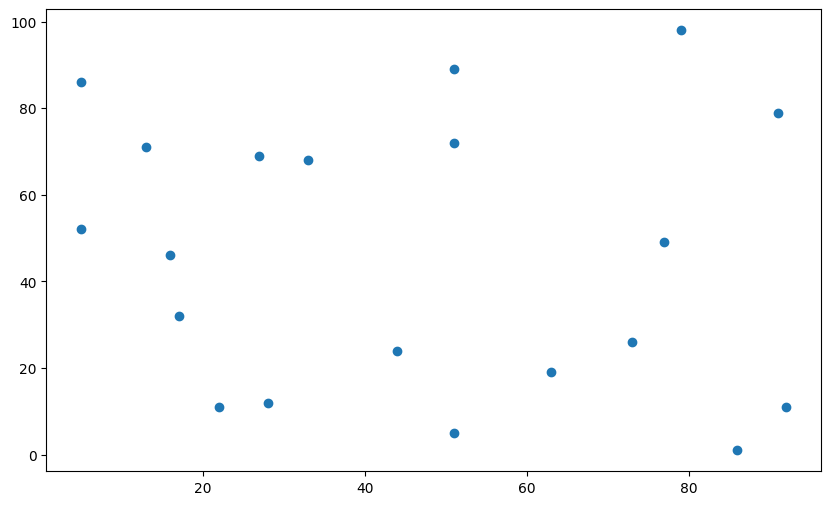

In [4]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot([p[0] for p in random_points], [p[1] for p in random_points], 'o')

## Plot Graham Scan

In [5]:
convex_hull = graham(random_points)

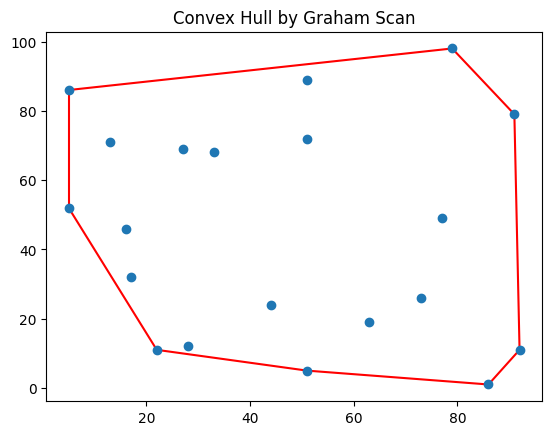

In [6]:
for i in range(len(convex_hull)):
    plt.plot([convex_hull[i][0], convex_hull[(i+1) % len(convex_hull)][0]],
             [convex_hull[i][1], convex_hull[(i+1) % len(convex_hull)][1]], 'r-')
plt.plot([p[0] for p in random_points], [p[1] for p in random_points], 'o')
plt.title('Convex Hull by Graham Scan')
plt.show()

## Live Demo

In [7]:
def decomposed_graham(points):
    # Sort the points according to their polar angle with the first point
    p0 = min(points, key=lambda p: (p[1], p[0]))
    points.sort(key=lambda p: (polar_angle(p0, p), dist(p0, p)))

    # The hull will consist of points making counterclockwise turns
    hull = []
    frames = []

    for i in range(len(points)):
        while len(hull) >= 2 and orientation(hull[-2], hull[-1], points[i]) != 1:
            hull.pop()
        hull.append(points[i])
        # Call the plotting function 
        frame = plot_progress(points, hull)  
        frames.append(frame)

    # Plot the final hull
    final_frame = plot_progress(points, hull, final=True)  
    frames.append(final_frame)
    return frames

def plot_progress(points, hull, final=False):
    plt.figure()
    xs, ys = zip(*points)
    plt.scatter(xs, ys)

    if hull:
        hx, hy = zip(*hull)
        plt.plot(hx, hy, 'r')

    plt.xlim(min(xs) - 1, max(xs) + 1)
    plt.ylim(min(ys) - 1, max(ys) + 1)

    if not final:
        plt.title('Progress of Convex Hull Construction with Graham Scan')
        plt.plot([hull[0][0], hull[-1][0]], [hull[0][1], hull[-1][1]], 'y--')
        plt.scatter([hull[-1][0]], [hull[-1][1]], color='yellow')
    else:
        plt.title('Final Convex Hull with Graham Scan')
        plt.plot([hull[-1][0], hull[0][0]], [hull[-1][1], hull[0][1]], linestyle='-', color='red')

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    img = imageio.imread(buf)

    # Small pause
    plt.pause(0.5)  
        
    # Clear the output to make the animation effect
    clear_output(wait=True)  
    if final:
        plt.show()
    else:
        plt.close()

    return img

def save_gif(frames, filename='graham_scan_procedure.gif', fps=10):
    imageio.mimsave(filename, frames, fps=fps)

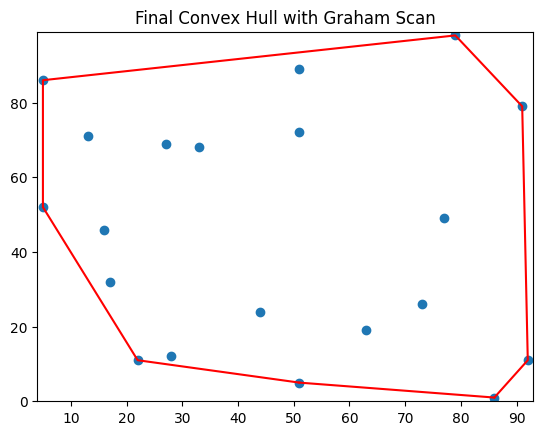

In [8]:
# Example set of points
frames = decomposed_graham(random_points)

#### Save the gif

In [ ]:
save_gif(frames)

# Optimization
Assuming the distribution points are uneven, we can achieve optimization by removing clusters gathered at the center. Here, we use the Ray-casting algorithm to remove the rectangle formed by the maximum values at the four edges.

In [9]:
def find_extreme_points(points):
    if not points:
        return []

    leftmost = rightmost = highest = lowest = points[0]

    for p in points[1:]:
        if p[0] < leftmost[0]:
            leftmost = p
        elif p[0] > rightmost[0]:
            rightmost = p

        if p[1] < highest[1]:
            highest = p
        elif p[1] > lowest[1]:
            lowest = p

    return [leftmost, highest, rightmost, lowest]

def is_inside_polygon(point, polygon):
    # Implementing a basic ray casting algorithm to check if a point is inside a polygon
    x, y = point
    count = 0
    n = len(polygon)

    for i in range(n):
        x1, y1 = polygon[i]
        x2, y2 = polygon[(i + 1) % n]

        # Check if the point is exactly on a vertex
        if (x, y) == (x1, y1):
            return True

        # Check if point is on an edge
        if y1 == y2 and y == y1:
            min_x, max_x = min(x1, x2), max(x1, x2)
            if min_x <= x <= max_x:
                return True

        # Check intersections with the edges
        if y1 < y <= y2 or y2 < y <= y1:
            x_to_check = x1 + (y - y1) * (x2 - x1) / (y2 - y1)
            if x <= x_to_check:
                count += 1

    return count % 2 == 1

def optimized_graham_scan(points):
    extreme_points = find_extreme_points(points)
    filtered_points = extreme_points + \
        [p for p in points if not is_inside_polygon(p, extreme_points)]

    return graham(filtered_points)


### Generate cluster points

In [10]:
def points_generator(cluster_points, cluster_range, sparse_points, sparse_range):
    random_points = [(random.randint(cluster_range[0], cluster_range[1]), random.randint(cluster_range[0], cluster_range[1])) for _ in range(cluster_points)]
    random_points += [(random.randint(sparse_range[0], sparse_range[1]), random.randint(sparse_range[0], sparse_range[1])) for _ in range(sparse_points)]
    return random_points

def calculate_filtered_ratio(points):
    extreme_points = find_extreme_points(points)
    filtered_points = [p for p in points if not is_inside_polygon(p, extreme_points)]
    filtered_points += extreme_points

    return len(filtered_points)/len(points)

In [11]:
opt_result = {}
for i in range(10):
    for steps in range(0, 3000, 100):
        points = points_generator(steps, (3000, 7000), 10, (0, 10000))
        ratio = calculate_filtered_ratio(points)

        graham_start = time.time()
        convex_hull = graham(points)
        graham_end = time.time()
        graham_time = graham_end - graham_start

        opt_graham_start = time.time()
        convex_hull = optimized_graham_scan(points)
        opt_graham_end = time.time()
        opt_graham_time = opt_graham_end - opt_graham_start

        opt_result[ratio] = graham_time/opt_graham_time

### Remove extreme values

In [12]:
# Calculating the IQR
ratios = list(opt_result.values())
Q1 = np.percentile(ratios, 25)
Q3 = np.percentile(ratios, 75)
IQR = Q3 - Q1

# Defining bounds for extreme values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out extreme values
opt_result = {ratio: time for ratio, time in opt_result.items() if lower_bound <= time <= upper_bound}

### Plot The Optimization Result

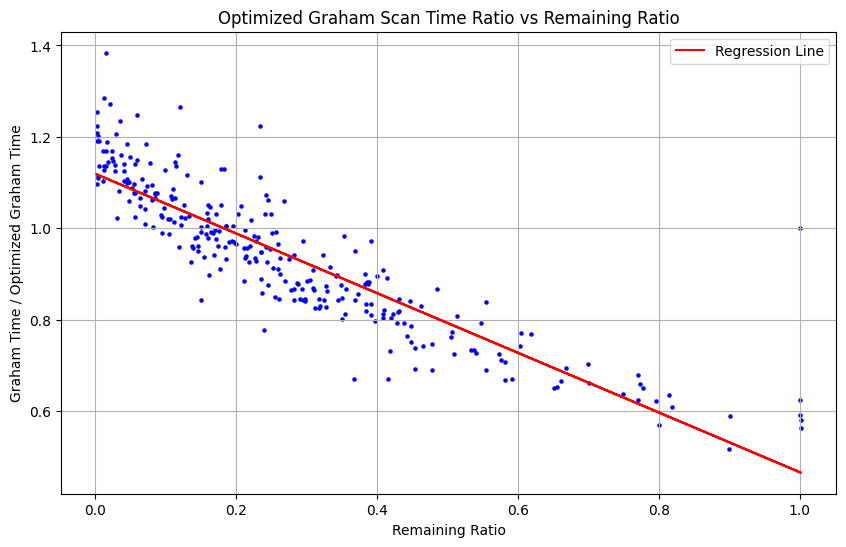

In [13]:
# Extracting x and y values
x_values = list(opt_result.keys())
y_values = list(opt_result.values())

x = np.array(x_values)
y = np.array(y_values)

# Calculating the coefficients of the linear regression line
slope, intercept = np.polyfit(x, y, 1)

# Creating y-values for the regression line
regression_line = slope * x + intercept

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values, color='blue', s=5)

# Plotting the regression line
plt.plot(x_values, regression_line, color='red', label='Regression Line')

# Adding title and labels
plt.title("Optimized Graham Scan Time Ratio vs Remaining Ratio")
plt.xlabel("Remaining Ratio")
plt.ylabel("Graham Time / Optimized Graham Time")
plt.legend()
plt.grid(True)

plt.show()